<h1> Credit Card Fraud Detection</h1>In today's era, it has become essential that credit card companies are able to identify fraudulent card transactions so that customers are not charged for items that they did not
buy. Machine learning techniques have proved to be an effective one in
detecting fraudulent transaction.






<h1> Data Set </h1>
The dataset used here is downloaded from Kaggle.The dataset contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced; the positive class (frauds) accounts for only 0.172% of all transactions.<br><br>
It contains only numerical input variables, which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount.' Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount; this feature can be used for example-dependant cost-sensitive learning.
Feature 'Class' is the response variable, and it takes value 1 in case of fraud and 0 otherwise. This feature is used to classify the transaction, whether it is fraud or not.<br><br>
It contains 31 columns.

<h1>What is Anamoly Detection?</h1><br>
Anomaly detection, or outlier detection, is an activity for
finding the patterns in dataset which do not conform to the
expected pattern or deviates from the expected behavior
greatly. Anomaly detection is of great significance in many
applications and there are many different methods available
for outlier detection so far. In general, anomaly detection
method can be categorized as distance-based method ,density-based method, modal-based method and
isolation-based method and so on. 

In this project, several anomaly detection techniques (Local outlier factor and isolation forest algorithm) of sklearn package have been explored to train a machine learning model to detect credit card fraud.

<h1>Isolation Forests</h1>
Isolation forests are an effective method for detecting outliers or novelties in data. It is a relatively novel method based on binary decision trees. Sci-Kit Learn’s implementation is relatively simple and easy to understand.
Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.
Then for prediction, it compares an observation against that splitting value in a “node”, that node will have two node children on which another random comparisons will be made. The number of “splittings” made by the algorithm for an instance is named: “path length”. As expected, outliers will have shorter path lengths than the rest of the observations. 

<h1>Local Outlier Factor</h1>
Local outlier factor is a density-based method that relies on nearest neighbours search. The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors
The LOF is a calculation that looks at the neighbors of a certain point to find out its density and compare this to the density of neighbour points later on. In short we can say that the density around an outlier object is significantly different from the density around its neighbors.

<h1>Exploratory Data Analysis</h1>

Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load data set

In [2]:
df=pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

First 5 rows

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Last 5 rows

In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Basic metadata

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Column names

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
x=df["Class"].value_counts()
print('Value Counts:')
print(x)
print('Percentage of Frauds:')
print(100*x[1]/(x[1]+x[0]),"%")

Value Counts:
0    284315
1       492
Name: Class, dtype: int64
Percentage of Frauds:
0.1727485630620034 %


Only 0.1727% (492 out of 284,807) transactions are **fraudulent**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


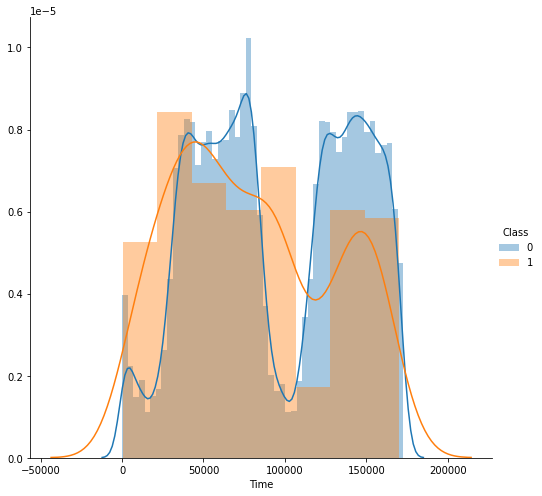

In [10]:
#Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=7)
 .map(sns.distplot,"Time")
 .add_legend())
plt.show()

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.It happens anytime of the day.
Hence, using time we can't distinguish and find the fraudulent transactions. 

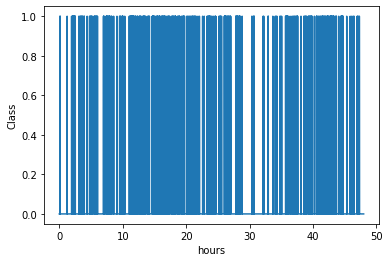

In [11]:
def sec_to_hours(sec):
    hours = sec/(60*60)
    return hours
hours = sec_to_hours(df['Time'])
plt.plot(hours,df['Class'])
plt.xlabel('hours')
plt.ylabel('Class')
plt.show()

Frauds happened between all the hours and most of them did not happen at a particular time

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


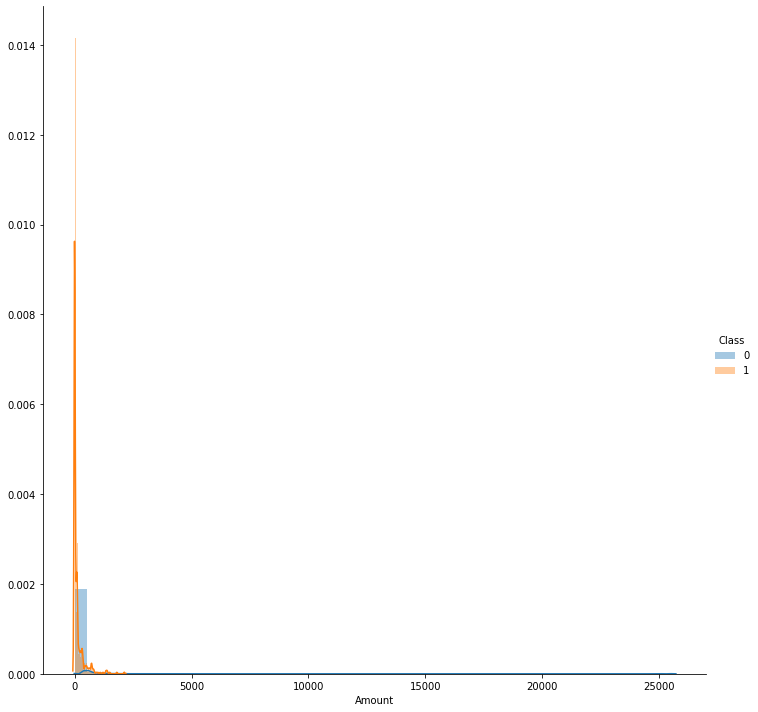

In [12]:
# Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=10)
 .map(sns.distplot,"Amount")
 .add_legend())
plt.show()

Most of the transactions are below 2000 dollars for both fraud and normal transactions

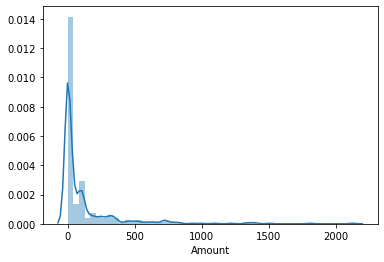

In [13]:
fraud=df.loc[df["Class"]==1]
normal=df.loc[df["Class"]==0]
sns.distplot(fraud.Amount)
plt.show()

All of the fraud transactions are below 2400 dollars and Most of them are below 500$


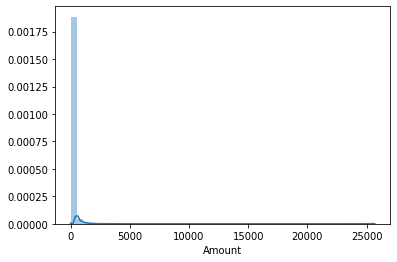

In [14]:
sns.distplot(normal.Amount)
plt.show()

Normal transactions are bit more spread than the fraud transactions in terms of amount and the non-fraud transactions mostly below 1000$

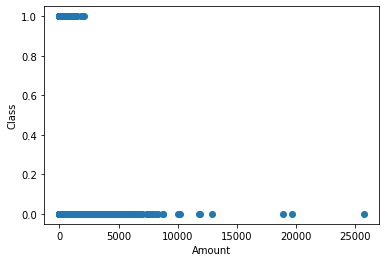

In [15]:
plt.scatter(df['Amount'],df['Class'])
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

Only few points in normal transactions are above 10,000$

<h3>
Correlation between features</h3>

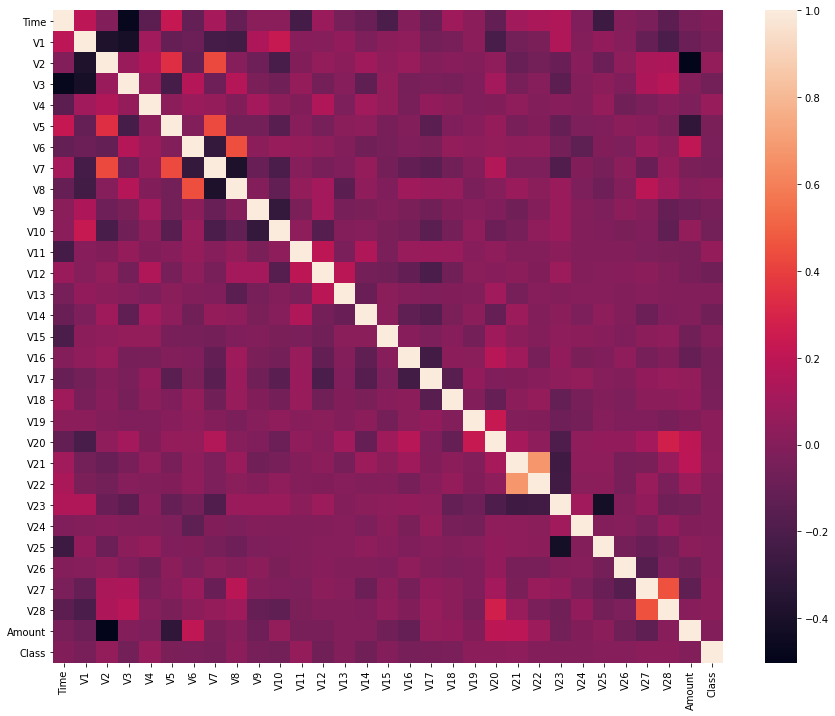

In [16]:
#Using Spearman Correlation Coefficient to see how much the features are co-related to each other
fig = plt.figure(figsize = (15, 12))
ax = sns.heatmap(df.corr(method='spearman'))
plt.show()

It seems the features are quite not related to each other as no points are
dark orange and very few are light orange which means few slightly related.

<h3>Looking the V's features</h3>
Frauds transactions will recieve "semi-salmon" color.<br>
Normal transactions will recieve "ocean" color.

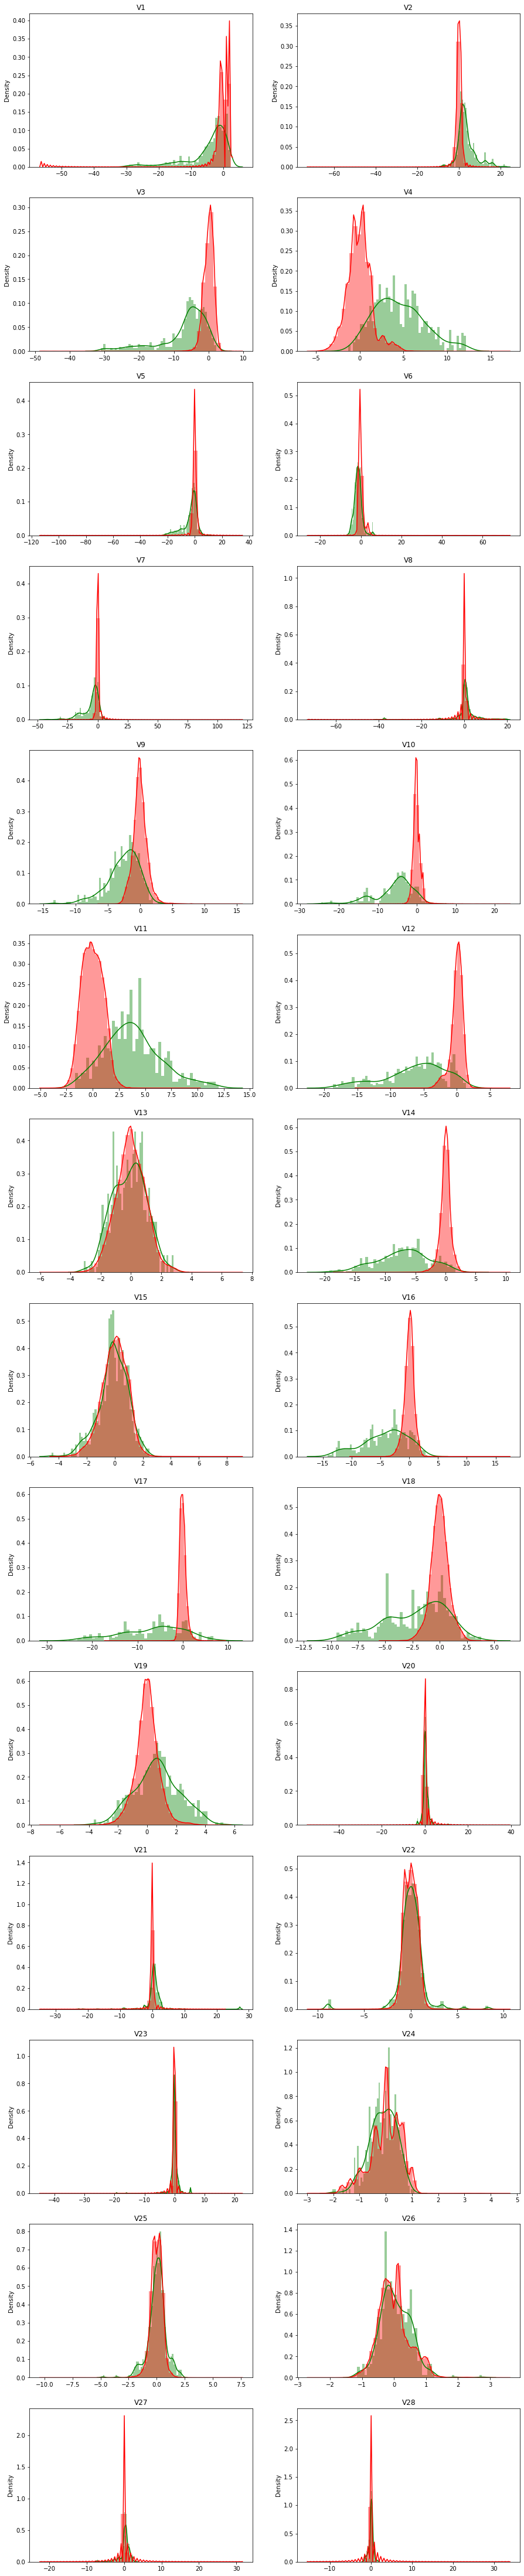

In [17]:
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" color
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

<h3>To check Outliers</h3>

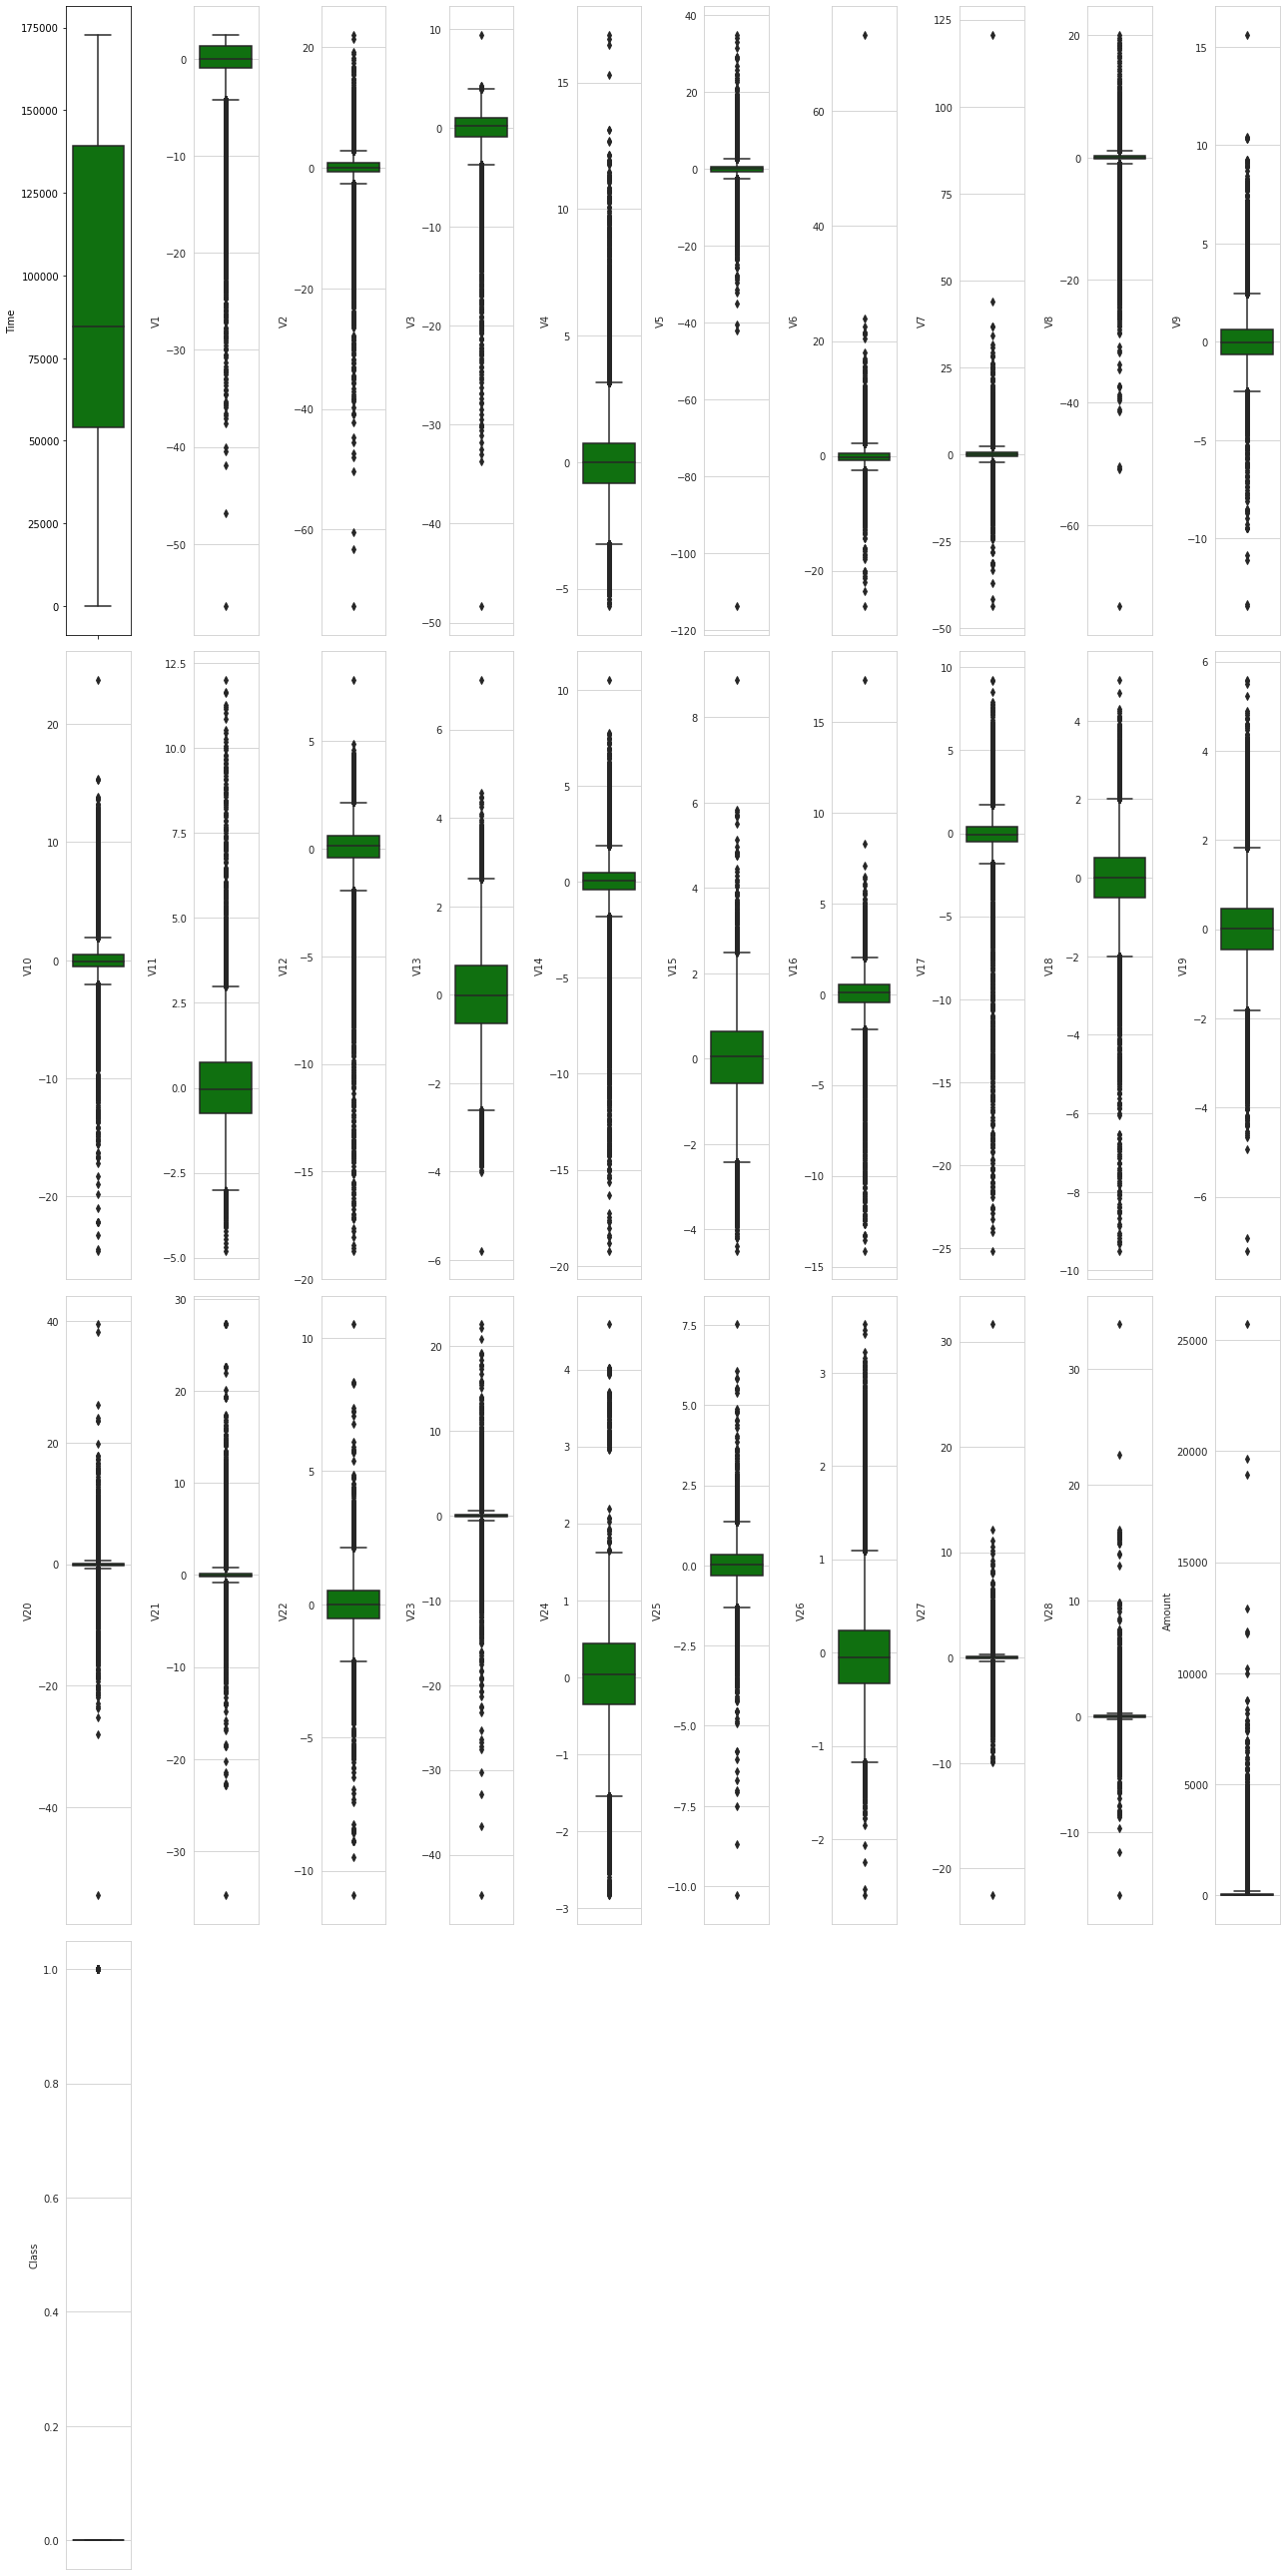

In [18]:
l = df.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns*1.8,9*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

<h3>To check distribution-Skewness</h3>

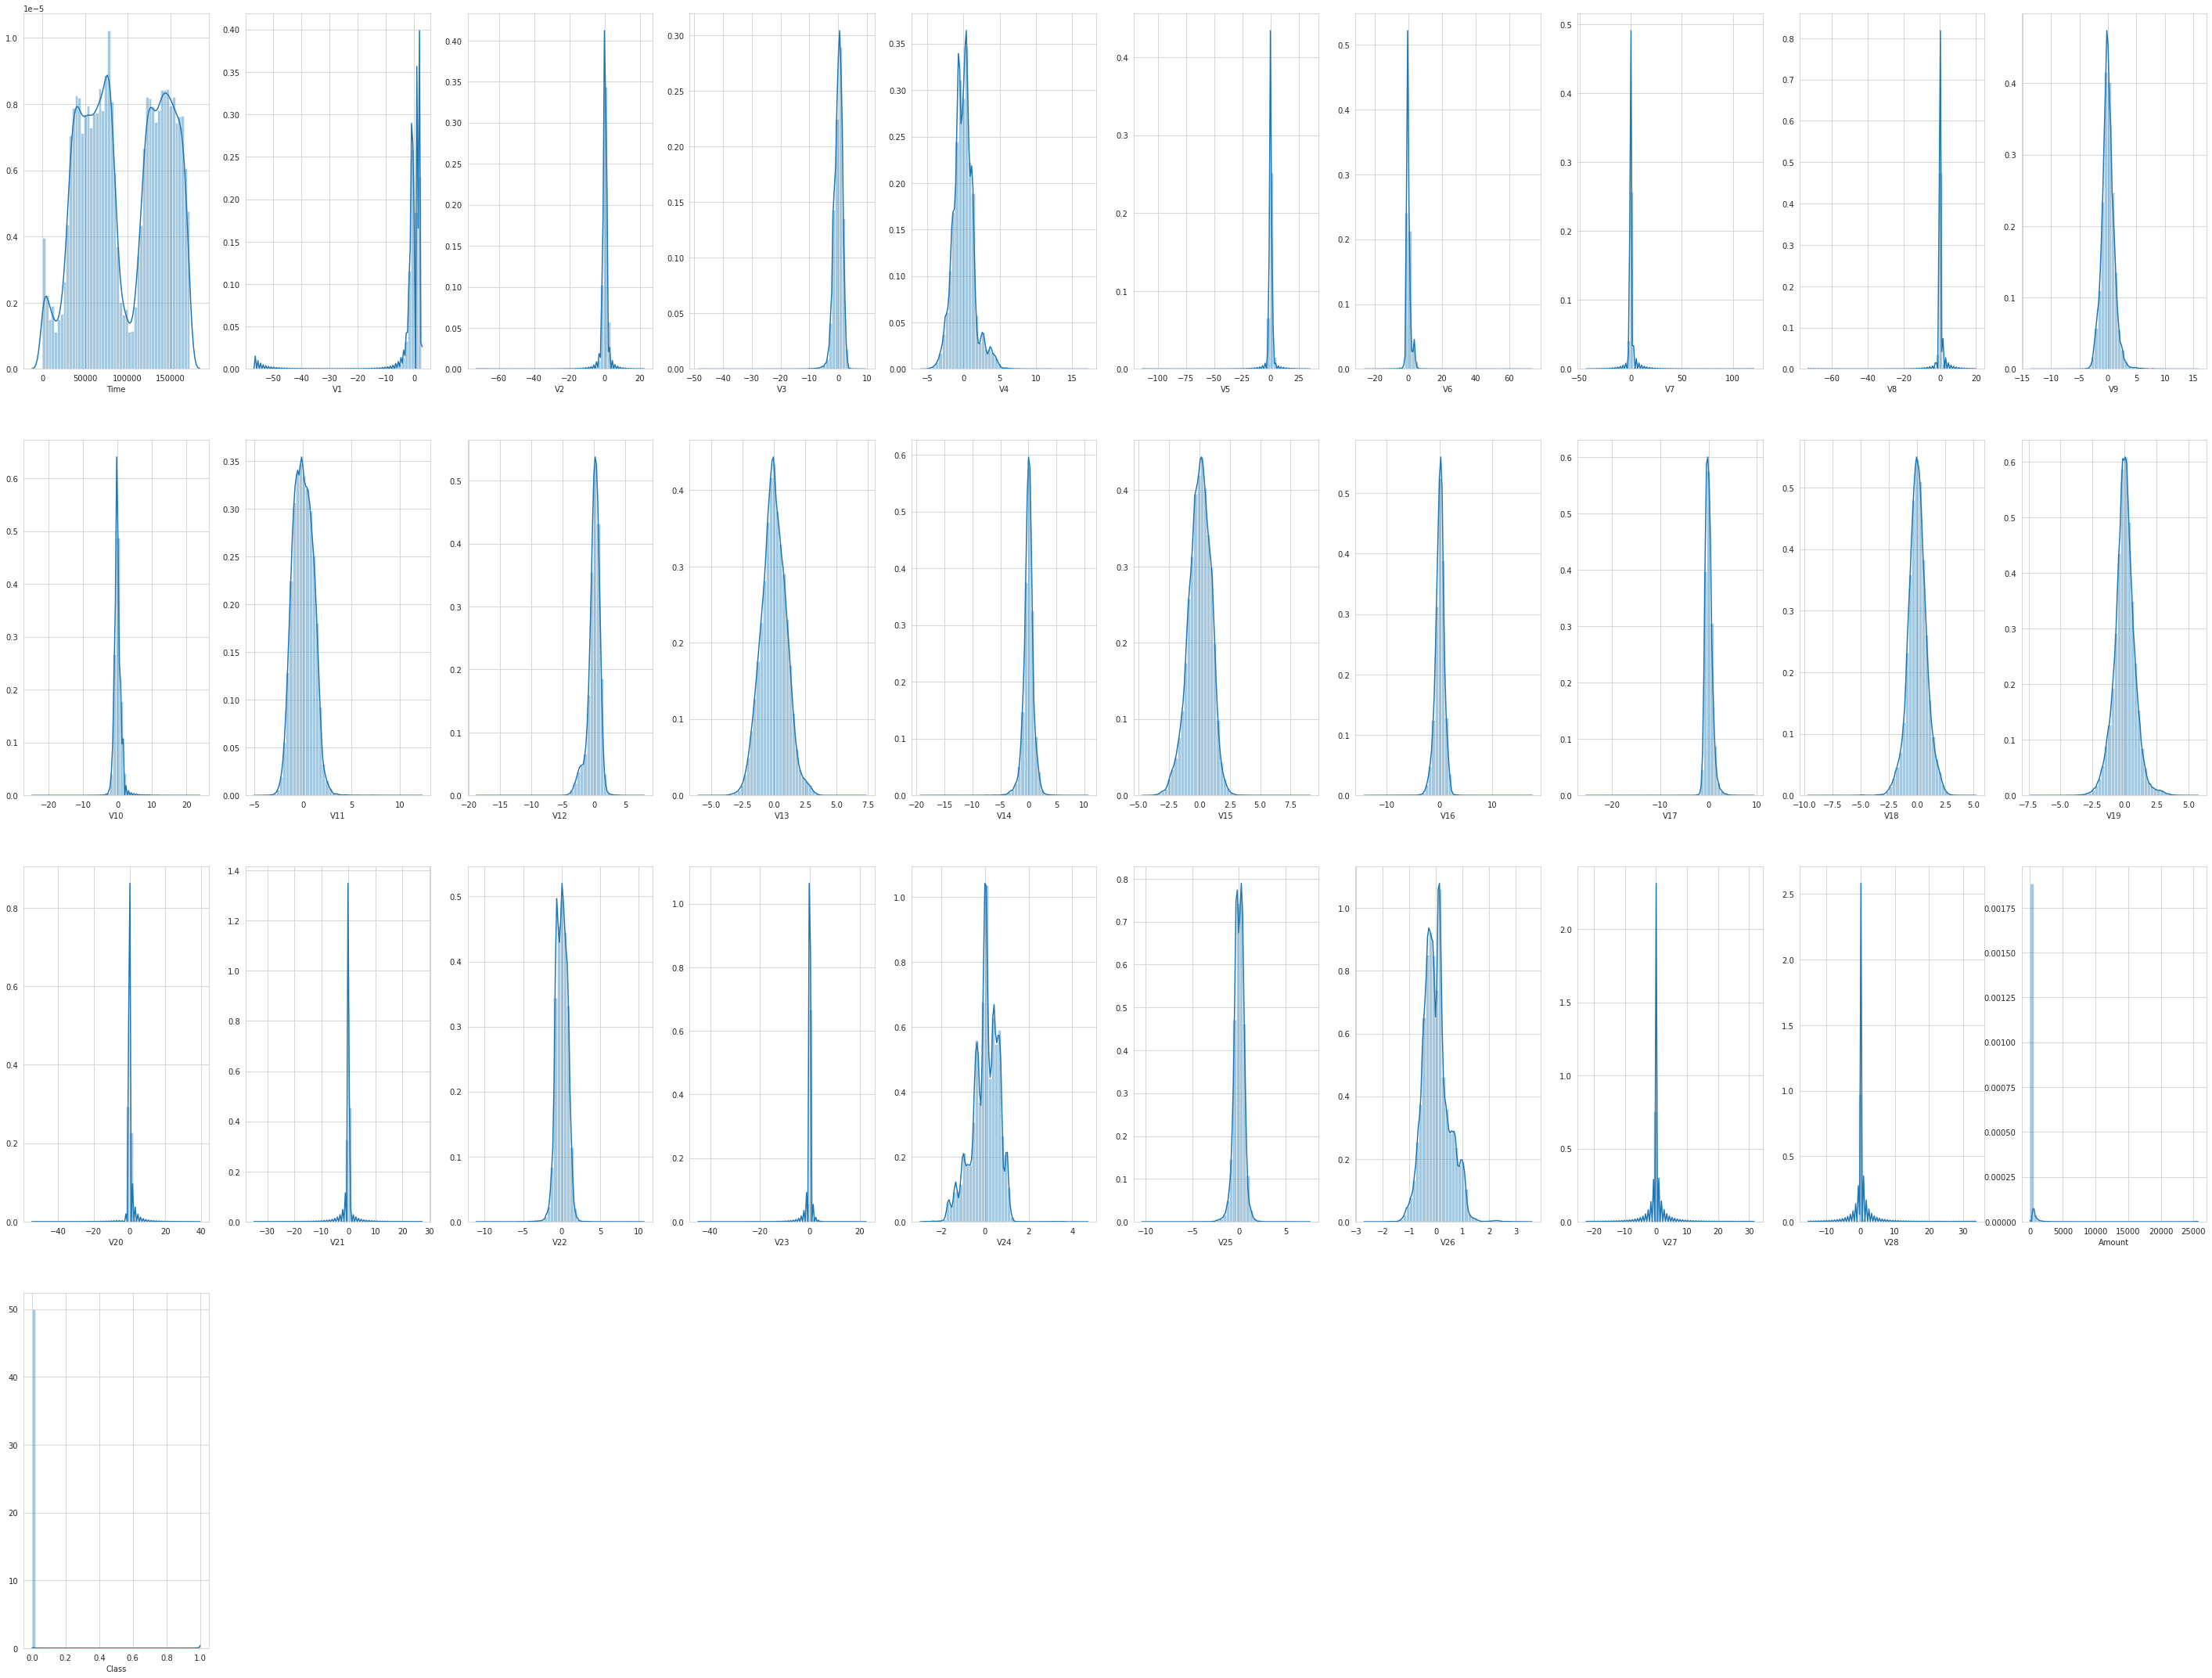

In [19]:
plt.figure(figsize=(5*number_of_columns,10*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

<h3>To check missing values</h3>

In [20]:
df.isnull().values.any()

False

In [21]:
!pip install missingno

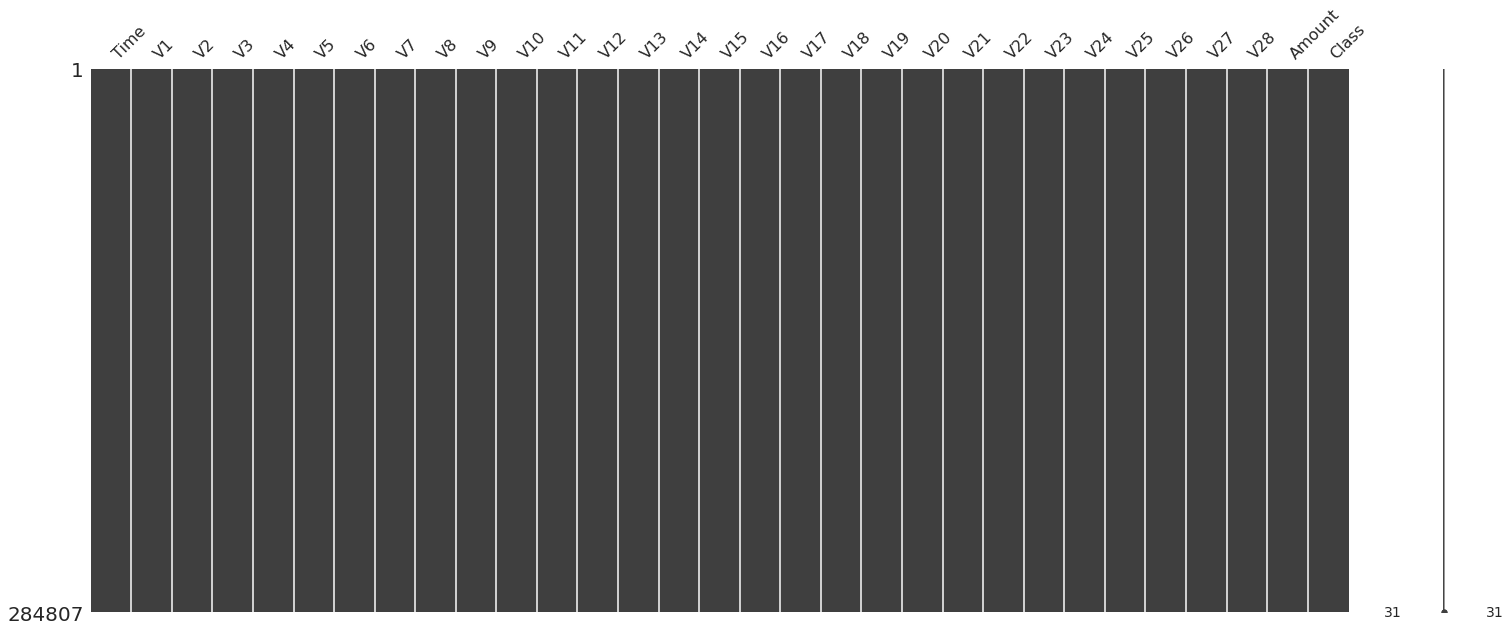

In [22]:
import missingno as msno
msno.matrix(df)

Dataset has no missing values.
If there were any, you would've noticed in figure represented by different colour shade on purple background.

**Given the class imbalance ratio, we are measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.**

<h1>Scaling</h1>

As data is given after PCA to hide original data so scalling was done on the variables except time and amount which we will scale

In [3]:
from sklearn.preprocessing import RobustScaler # it is prone to outliers
ss1= RobustScaler()
df['Amount']= ss1.fit_transform(df['Amount'].values.reshape(-1, 1))

ss2= RobustScaler()
df['Time']= ss2.fit_transform(df['Time'].values.reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


<h1>Sub Sampling</h1>

As the dataset is quite big, we will select a subsample to make the analysis much faster.

In [4]:
data = df.sample(frac=1, random_state=1234) #Shuffle rows

fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:30000]

united_data = pd.concat([fraud_data, non_fraud_data])

new_data = united_data.sample(frac=1, random_state=42) #Shuffle rows
new_data.shape

(30492, 31)

<h1> Train Test Split </h1>

Spliting on original dataset

In [5]:
xorg=df.drop('Class',axis=1)
yorg= df.loc[:,'Class']

from sklearn.model_selection import train_test_split
xorgtrain,xorgtest,yorgtrain,yorgtest= train_test_split(xorg,yorg,test_size=0.2,random_state=9)

Spliting on dataset after sub sampling

In [6]:
from sklearn.model_selection import train_test_split
x=new_data.drop('Class',axis=1).values
y= new_data.loc[:,'Class'].values

# SPlitting the test and train after removing outliers

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

<h1>Classifiers</h1>
Using Logistic Regression, K Nearest Neighbor (KNN), Support Vector Classifier (SVC) and Decision Tree Classifiers 

In [42]:
classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier(),
}

import warnings
warnings.filterwarnings('ignore')

In [43]:
for key,values in classifier.items():
    values.fit(xtrain,ytrain)
    training_score= cross_val_score(values,xtrain,ytrain,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, xtrain, ytrain, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(ytrain,train_pred)*100,2)))
    test_score= cross_val_score(values,xtest,ytest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xtest, ytest, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(ytest,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 99.63
Roc_Auc training score for Logistic Regression is 90.69: 
Test accuracy score of Logistic Regression is 99.48
Roc_Auc test score for Logistic Regression is 87.42: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 99.63
Roc_Auc training score for KNN is 90.81: 
Test accuracy score of KNN is 99.57
Roc_Auc test score for KNN is 86.35: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 99.6
Roc_Auc training score for SVC is 89.46: 
Test accuracy score of SVC is 99.34
Roc_Auc test score for SVC is 78.95: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.4
Roc_Auc training score for DecisionTree is 90.69: 
Test accuracy score of DecisionTree is 99.36
Roc_Auc test score for DecisionTree is 89.02: 
-----

In [44]:
for key,values in classifier.items():
    values.fit(xtrain,ytrain)
    test_score= cross_val_score(values,xorgtest,yorgtest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xorgtest,yorgtest, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(yorgtest,test_pred)*100,2)))
    print('---'*30)

Test accuracy score of Logistic Regression is 99.93
Roc_Auc test score for Logistic Regression is 83.16: 
------------------------------------------------------------------------------------------
Test accuracy score of KNN is 99.92
Roc_Auc test score for KNN is 84.15: 
------------------------------------------------------------------------------------------
Test accuracy score of SVC is 99.91
Roc_Auc test score for SVC is 75.74: 
------------------------------------------------------------------------------------------
Test accuracy score of DecisionTree is 99.9
Roc_Auc test score for DecisionTree is 84.63: 
------------------------------------------------------------------------------------------


<h1> Grid Search to find best parameters</h1>

In [50]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(xtrain, ytrain)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))






In [46]:
grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [47]:
grid_search(KNeighborsClassifier(),knears_params)


KNeighborsClassifier algorithm best parameter are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [48]:
grid_search(SVC(),svc_params)

SVC algorithm best parameter are : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [49]:
grid_search(DecisionTreeClassifier(),tree_params)

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [51]:
classifier_2= {
    'Logistic Regression':LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False),
    'KNN':KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'),
    'SVC':SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
    'DecisionTree':DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
}


In [52]:
for key,values in classifier_2.items():
    values.fit(xtrain,ytrain)
    training_score= cross_val_score(values,xtrain,ytrain,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, xtrain, ytrain, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(ytrain,train_pred)*100,2)))
    test_score= cross_val_score(values,xtest,ytest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xtest, ytest, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(ytest,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 99.64
Roc_Auc training score for Logistic Regression is 90.69: 
Test accuracy score of Logistic Regression is 99.54
Roc_Auc test score for Logistic Regression is 88.01: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 99.66
Roc_Auc training score for KNN is 90.58: 
Test accuracy score of KNN is 99.49
Roc_Auc test score for KNN is 84.07: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 99.64
Roc_Auc training score for SVC is 90.45: 
Test accuracy score of SVC is 99.56
Roc_Auc test score for SVC is 86.9: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.62
Roc_Auc training score for DecisionTree is 90.93: 
Test accuracy score of DecisionTree is 99.7
Roc_Auc test score for DecisionTree is 91.44: 
-----

In [53]:
for key,values in classifier_2.items():
    values.fit(xtrain,ytrain)
    test_score= cross_val_score(values,xorgtest,yorgtest,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, xorgtest,yorgtest, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(yorgtest,test_pred)*100,2)))
    print('---'*30)

Test accuracy score of Logistic Regression is 99.92
Roc_Auc test score for Logistic Regression is 80.69: 
------------------------------------------------------------------------------------------
Test accuracy score of KNN is 99.92
Roc_Auc test score for KNN is 80.19: 
------------------------------------------------------------------------------------------
Test accuracy score of SVC is 99.93
Roc_Auc test score for SVC is 88.6: 
------------------------------------------------------------------------------------------
Test accuracy score of DecisionTree is 99.92
Roc_Auc test score for DecisionTree is 84.64: 
------------------------------------------------------------------------------------------


<h1>Anamoly Detection Algorithms</h1>

In [8]:
outlier_fraction=0.0017234102419808666
state = np.random.RandomState(40)
algorithm={
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction),
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(xtrain), 
                                       contamination=outlier_fraction,random_state=state, verbose=0)
    
}

In [9]:
from sklearn.metrics import classification_report,accuracy_score
for i,(key,values) in enumerate(algorithm.items()):
  print(values)
  if key == "Local Outlier Factor":
      y_pred = values.fit_predict(xorg)
      scores_prediction = values.negative_outlier_factor_
  # elif key == "Support Vector Machine":
  #     values.fit(xorg)
  #     y_pred = values.predict(xorg)
  else:    
      values.fit(xorg)
      scores_prediction = values.decision_function(xorg)
      y_pred = values.predict(xorg)
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  n_errors = (y_pred != yorg).sum()
  # Run Classification Metrics
  print("{}: {}".format(key,n_errors))
  print("Accuracy Score :")
  print(accuracy_score(yorg,y_pred))
  print("Classification Report :")
  print(classification_report(yorg,y_pred))

LocalOutlierFactor(algorithm='auto', contamination=0.0017234102419808666,
                   leaf_size=30, metric='minkowski', metric_params=None,
                   n_jobs=None, n_neighbors=20, novelty=False, p=2)
Local Outlier Factor: 983
Accuracy Score :
0.9965485398884156
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0017234102419808666, max_features=1.0,
                max_samples=24393, n_estimators=100, n_jobs=None,
                random_state=RandomState(MT19937) at 0x7F5C1ED6A048, verbose=0,
                warm_start=False)
Isolation Forest: 649
Accuracy Score :
0.9977212638734301
Classi

<h1>Conclusion</h1>

The best ROC AUC score is of SVC ( 88.6) .<br>
Isolation Forest detected 983 errors versus Local Outlier Factor detecting 649 errors .